<a href="https://colab.research.google.com/github/anuragiiser/SS4201_Assignment_2/blob/main/RK4_ODE_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
G = 4.0/3.0
l0 = 2.0
K = 1e-1

In [4]:
def func_R(r,z,y):
  return (1/(K*G))*(y**(2-G))*(-r/((r**2+z**2)**1.5) + (l0**2)/(r**3))

In [5]:
def func_Z(r,z,y):
  return (1/(K*G))*(y**(2-G))*(-(z)/((r**2+z**2)**1.5))

In [6]:
def rk4(func,a,b,c,h1,N):
  c_evol = []
  for p in range(N):
    k1 = h1 * func(a,b,c)
    k2 = h1 * func(a+0.5*h1 , b , c+0.5*k1)
    k3 = h1 * func(a+0.5*h1 , b , c+0.5*k2)
    k4 = h1 * func(a+h1 , b , c+k3)

    c = c + ((1.0/6.0) * (k1 + 2*k2 + 2*k3 + k4))
    a = a + h1
    c_evol.append(c)
  return c_evol

In [7]:
R = np.linspace(1,17,500,endpoint=True)
Z = np.linspace(0,5,500,endpoint=True)
hr = R[1] - R[0]
hz = Z[1] - Z[0]
rho0 = 1e-120
Z0 = 0
rho_r = rk4(func_R,R[0],Z0,rho0,hr,500)

Text(0.5, 1.0, 'Variation of density vs R at Z = 0')

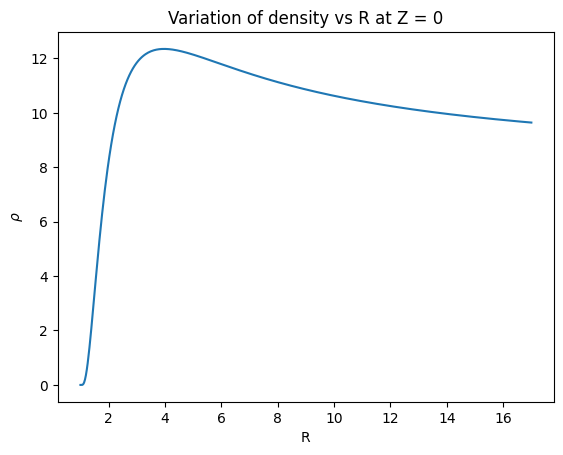

In [8]:
plt.plot(R,rho_r)
plt.xlabel('R')
plt.ylabel(r'$\rho$')
plt.title('Variation of density vs R at Z = 0')

In [9]:
rho_z_matrix = []
for i in range(len(R)):
  rho_z = []
  rho_z0 = rho_r[i]
  rho_z = rk4(func_Z,Z[0],R[i],rho_z0,hz,500)
  rho_z_matrix.append(rho_z[::-1])

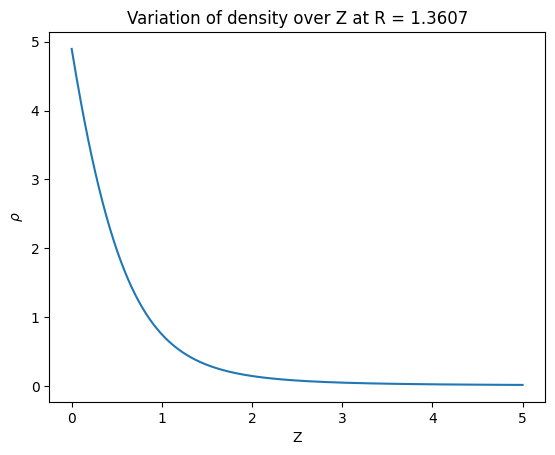

In [10]:
rho_z0_init = rho_r[20]
rho_z_init = rk4(func_Z,Z[0],R[20],rho_z0_init,hz,500)
plt.plot(Z,rho_z_init)
plt.xlabel('Z')
plt.ylabel(r'$\rho$')
plt.title('Variation of density over Z at R = 1.3607')
rho_z_matrix = np.array(rho_z_matrix)

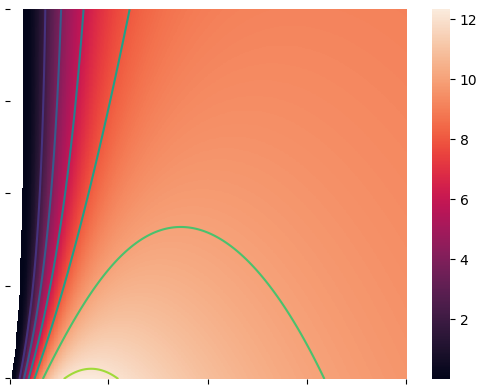

In [11]:
num_ticks = 5
# the index of the position of yticks
yticks = np.linspace(0, len(Z) - 1, num_ticks, dtype=int)
xticks = np.linspace(0, len(R) - 1, num_ticks, dtype=int)
# the content of labels of these yticks
yticklabels = [Z[idx] for idx in yticks]
xticklabels = [Z[idx] for idx in xticks] 
ax = sns.heatmap(rho_z_matrix.T,xticklabels=xticklabels,
                 yticklabels=yticklabels)
ax.set_yticks(yticks)
ax.set_xticks(xticks)
ax.contour(np.linspace(0,500,500,endpoint=True),
           np.linspace(0,500,500,endpoint=True),rho_z_matrix.T)